Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
file = pd.read_excel("Precio/Precio_Bolsa_Nacional_($kwh)_1995.xlsx",header=2)

colname = ["fecha","hora","precio"]

data = []
for i in range(file.shape[0]):    
    for j in range(1,25):
        #print(str(file.iloc[i,0])+" "+str(j-1)+" "+str(file.iloc[i,j]))
        data.append([file.iloc[i,0],j-1,file.iloc[i,j]])      

In [3]:
data = []
for k in range(1995,2016):
    filename= "Precio/Precio_Bolsa_Nacional_($kwh)_"+str(k)+".xlsx"
    file = pd.read_excel(filename,header=2)    
    for i in range(file.shape[0]):
        for j in range(1,25):
            data.append([file.iloc[i,0],j-1,file.iloc[i,j]])   
            
for k in range(2016,2019):
    filename= "Precio/Precio_Bolsa_Nacional_($kwh)_"+str(k)+".xls"
    file = pd.read_excel(filename,header=2)    
    for i in range(file.shape[0]):
        for j in range(1,25):
            data.append([file.iloc[i,0],j-1,file.iloc[i,j]])       

df = pd.DataFrame(data,columns=colname)

**2.--** Compute e imprima el número de registros con datos faltantes.

In [4]:
(df.isna().sum()).sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [5]:
(df.duplicated()).sum()

1951

In [6]:
df.shape

(201816, 3)

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [7]:
df1=df.drop_duplicates()
df1.shape

(199865, 3)

In [8]:
df1=df1.dropna()
df1.shape

(199819, 3)

**5.--** Compute y grafique el precio primedio diario.

In [10]:
df1.fecha = pd.to_datetime(df1.fecha)
df1['day'] = df1.fecha.dt.day
df1.head()

,fecha,hora,precio,day
1,1995-07-20,1,1.073,20
2,1995-07-20,2,1.073,20
3,1995-07-20,3,1.073,20
4,1995-07-20,4,1.073,20
5,1995-07-20,5,1.073,20


In [11]:
prom_diario = df1.groupby(['day']).mean()[['precio']].reset_index()
prom_diario.head()

,day,precio
0,1,107.854329
1,2,108.913259
2,3,110.298928
3,4,111.968630
4,5,111.388790


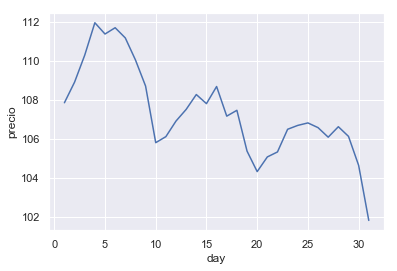

In [14]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="day", y="precio", data=prom_diario)

**6.--** Compute y grafique el precio máximo por mes.

In [25]:
df1['month'] = df1.fecha.dt.month
precio_max_mes = df1.groupby(['month']).max()[['precio']].reset_index()
precio_max_mes.head()
x=df1['month']
y=df1['precio']

Text(0.5, 1.0, 'Precio máximo por mes')

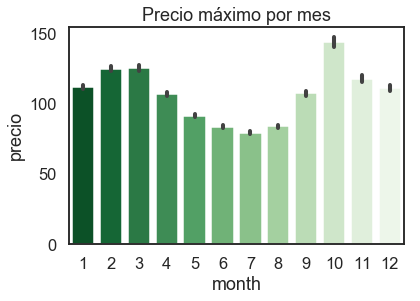

In [35]:
sns.set(style="white", context="talk")
sns.barplot(x=x, y=y, palette="Greens_r").set_title("Precio máximo por mes")

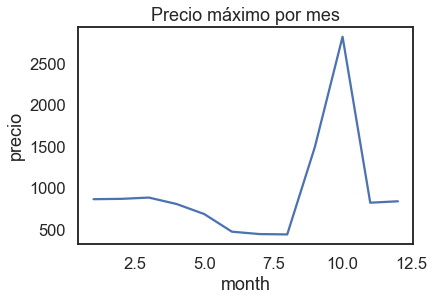

In [36]:
ax = sns.lineplot(x="month", y="precio", data=precio_max_mes).set_title("Precio máximo por mes")

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 1.0, 'Precio mínimo por mes')

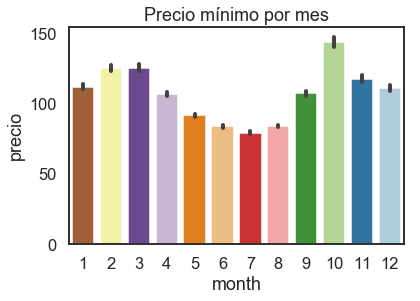

In [34]:
precio_min_mes = df1.groupby(['month']).min()[['precio']].reset_index()
precio_min_mes.head()
x=df1['month']
y=df1['precio']
sns.set(style="white", context="talk")
sns.barplot(x=x, y=y, palette="Paired_r").set_title("Precio mínimo por mes")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

In [19]:
import sys
import os

In [32]:
os.listdir("Precio")

['Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2013.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2014.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2015.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2016.xls',
 'Precio_Bolsa_Nacional_($kwh)_2017.xls',
 'Precio_Bols

In [31]:
ls -1v Precio*

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 2009-5473

 Directorio de C:\Users\Lina\Documents\GitHub\lab-analisis-exploratorio-de-datos-linagrajales


 Directorio de C:\Users\Lina\Documents\GitHub\lab-analisis-exploratorio-de-datos-linagrajales

20/08/2018  07:26            32.811 Precio_Bolsa_Nacional_($kwh)_1995.xlsx
20/08/2018  07:26            54.137 Precio_Bolsa_Nacional_($kwh)_1996.xlsx
20/08/2018  07:26            63.945 Precio_Bolsa_Nacional_($kwh)_1997.xlsx
20/08/2018  07:26            63.547 Precio_Bolsa_Nacional_($kwh)_1998.xlsx
20/08/2018  07:26            53.107 Precio_Bolsa_Nacional_($kwh)_1999.xlsx
20/08/2018  07:26            58.123 Precio_Bolsa_Nacional_($kwh)_2000.xlsx
20/08/2018  07:26            56.834 Precio_Bolsa_Nacional_($kwh)_2001.xlsx
20/08/2018  07:26            57.248 Precio_Bolsa_Nacional_($kwh)_2002.xlsx
20/08/2018  07:26            56.301 Precio_Bolsa_Nacional_($kwh)_2003.xlsx
20/08/2018  07:26            56.632 Preci

In [51]:
file.shape[1]-1

25

In [48]:
file.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Version
0,2018-01-01,123.167294,123.167294,123.167294,123.167294,123.167294,123.167294,101.647294,101.647294,112.139294,...,123.167294,123.167294,123.167294,128.167294,128.167294,128.167294,128.167294,123.167294,123.167294,TXF
1,2018-01-02,104.201894,104.201894,104.201894,104.201894,104.201894,106.024894,142.201894,119.201894,149.201894,...,149.201894,149.201894,149.201894,152.201894,152.201894,152.201894,149.201894,149.201894,142.201894,TXF
2,2018-01-03,104.139873,106.062873,103.129873,104.139873,104.139873,106.062873,106.062873,125.239873,135.239873,...,149.439873,149.439873,149.439873,152.239873,152.239873,163.239873,149.439873,149.439873,135.239873,TXF
3,2018-01-04,132.136385,132.136385,132.136385,111.843385,132.136385,138.136385,138.136385,144.136385,148.136385,...,150.136385,155.136385,148.136385,153.236385,153.236385,153.236385,150.136385,148.136385,144.136385,TXF
4,2018-01-05,128.855667,122.855667,122.855667,122.855667,122.855667,122.855667,128.855667,128.855667,140.855667,...,143.955667,143.955667,143.955667,143.955667,143.955667,143.955667,143.955667,140.855667,128.855667,TXF
